In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# 1. Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
species = iris.target_names

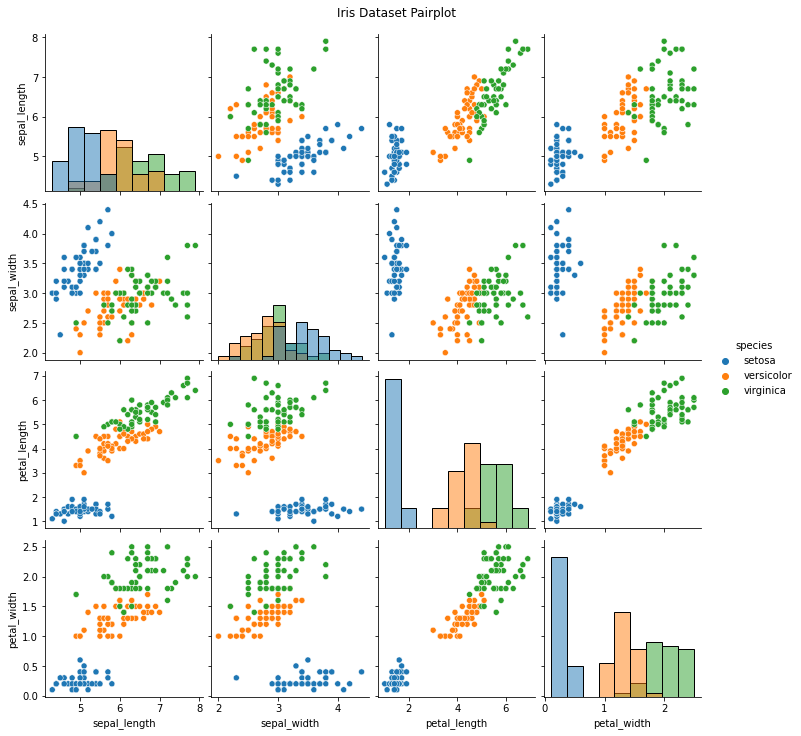

In [4]:
# 2. Visualize dataset
sns.pairplot(
data=sns.load_dataset("iris"),
hue="species",
diag_kind="hist"
)
plt.suptitle("Iris Dataset Pairplot", y=1.02)
plt.show()

In [5]:
# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
# 4. Preprocess (Standardize features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# 5. Try different classifiers
classifier= {
"Decision Tree": DecisionTreeClassifier(random_state=42)
}
for name, clf in classifier.items():
 clf.fit(X_train, y_train)
 y_pred = clf.predict(X_test)


print(f"\n{name} Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=species))


Decision Tree Results:
Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



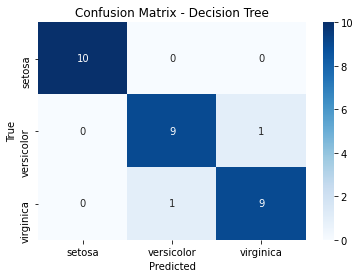

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=species, yticklabels=species)
plt.title(f"Confusion Matrix - {name}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()